# Image Encryption Analysis

In [13]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm
from skimage.measure import compare_ssim as ssim

In [ ]:
# Downloading Image
!wget https://raw.githubusercontent.com/RizkiPutra660/AplikasiPerpanjanganSTNK/main/Gambar%20Uji%20Coba/KTPDummy.bmp
!wget https://raw.githubusercontent.com/RizkiPutra660/AplikasiPerpanjanganSTNK/main/Gambar%20Uji%20Coba/KTPDummyGrayScale.bmp
!wget https://raw.githubusercontent.com/RizkiPutra660/AplikasiPerpanjanganSTNK/main/Gambar%20Uji%20Coba/KTPDummy_eA.bmp
!wget https://raw.githubusercontent.com/RizkiPutra660/AplikasiPerpanjanganSTNK/main/Gambar%20Uji%20Coba/KTPDummy_eA_dA.bmp
!wget https://raw.githubusercontent.com/RizkiPutra660/AplikasiPerpanjanganSTNK/main/Gambar%20Uji%20Coba/KTPDummy_eH.bmp
!wget https://raw.githubusercontent.com/RizkiPutra660/AplikasiPerpanjanganSTNK/main/Gambar%20Uji%20Coba/KTPDummy_eHA.bmp
!wget https://raw.githubusercontent.com/RizkiPutra660/AplikasiPerpanjanganSTNK/main/Gambar%20Uji%20Coba/KTPDummyInvert.bmp

In [18]:
image = "KTPDummy"
ext = ".bmp"

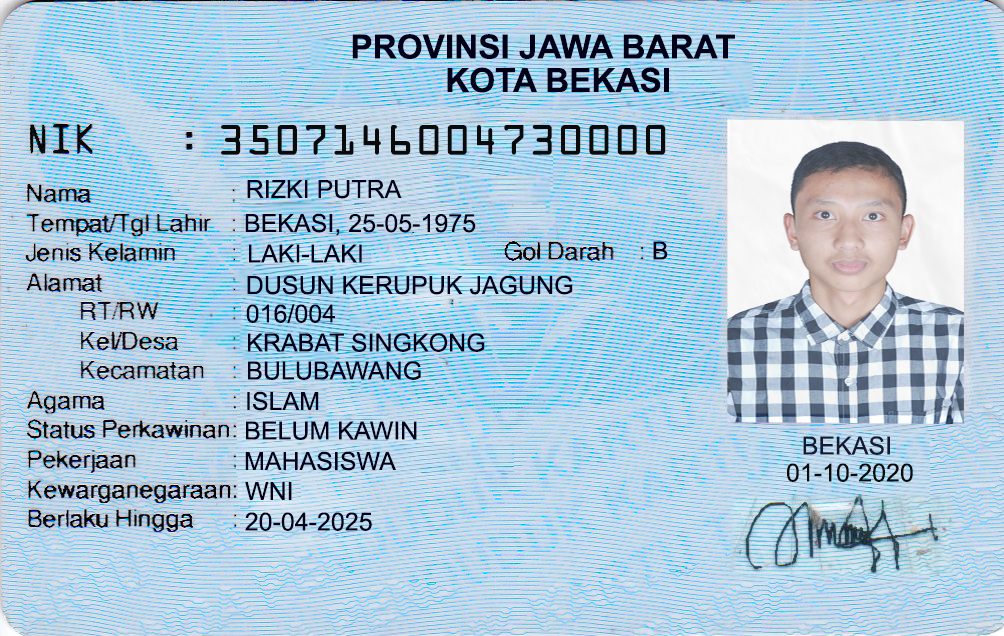

In [19]:
img = cv2.imread(image + ext)
cv2_imshow(img)

## Histogram Analysis


The ciphertext image histogram analysis is one of the most straight-forward methods ofillustrating the image encryption quality. A good image encryption method tends to encrypt a plaintext image to a random incomprehensible form. Thus a good image encyption technique generates a cipher image that has a uniformly distributed intensity histogram.

### Original Image

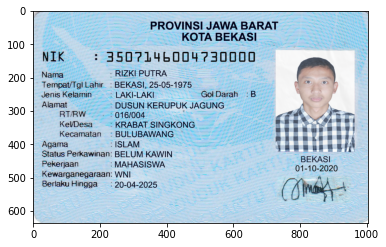

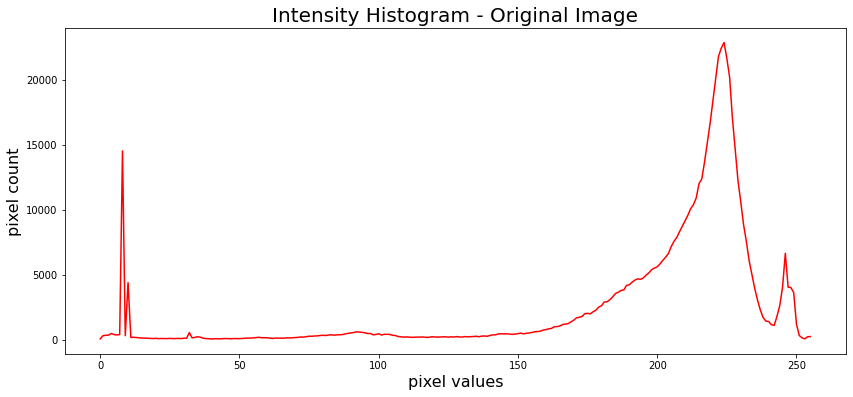

In [5]:
image = "KTPDummy"
ext = ".bmp"
img = cv2.imread(image + ext, 0) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='red') 
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

### Encrypted Image

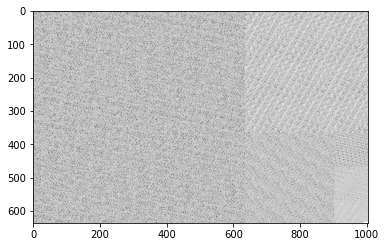

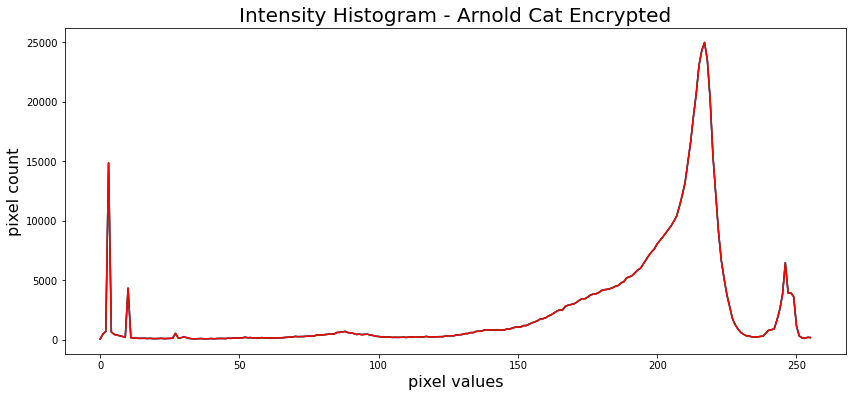

In [6]:
image = "KTPDummy_eA"
ext = ".bmp"
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Arnold Cat Encrypted', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

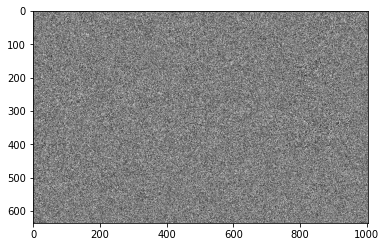

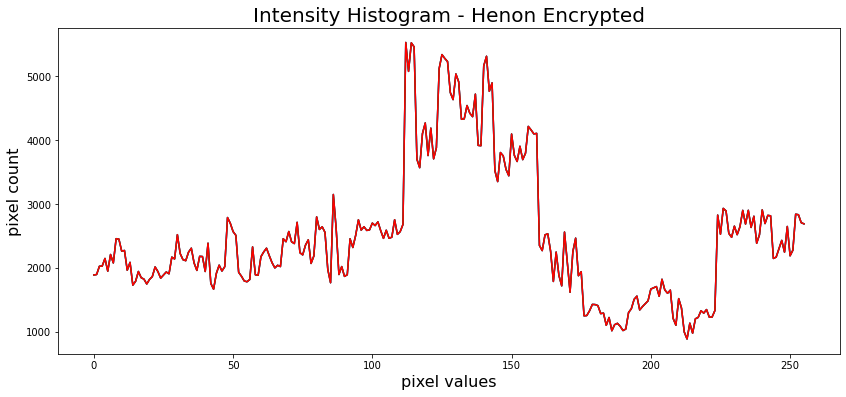

In [7]:
image = "KTPDummy_eH"
ext = ".bmp"
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Henon Encrypted', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

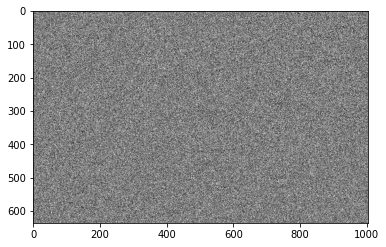

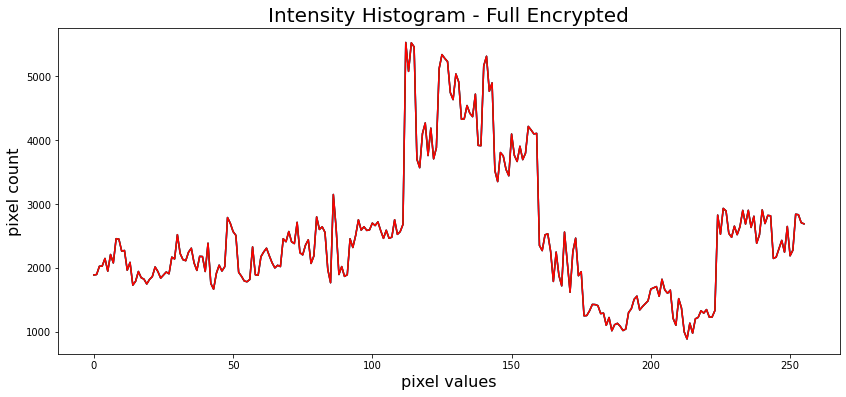

In [8]:
image = "KTPDummy_eHA"
ext = ".bmp"
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Full Encrypted', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

#MSE (Mean Square Error) dan Structural Similarity (SSIM)

---



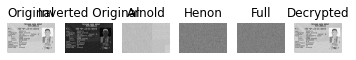

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  app.launch_new_instance()


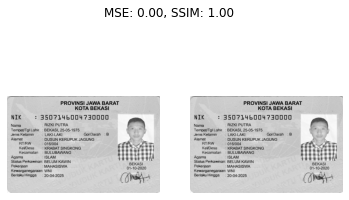

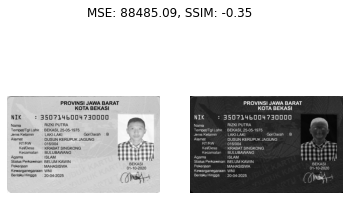

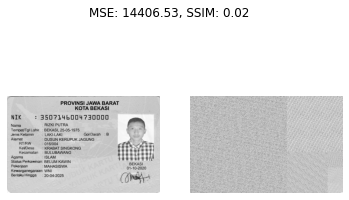

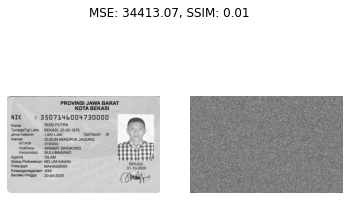

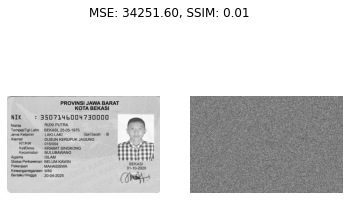

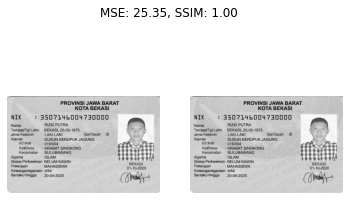

In [17]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB, multichannel=True)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()
 
# load the images -- the original, the original + contrast,
# and the original + photoshop
#original = cv2.imread("KTPDummy.bmp")
original = cv2.imread("KTPDummyGrayScale.bmp")
invertedOriginal = cv2.imread("KTPDummyInvert.bmp")
arnold = cv2.imread("KTPDummy_eA.bmp")
henon = cv2.imread("KTPDummy_eH.bmp")
full = cv2.imread("KTPDummy_eHA.bmp")
decrypted = cv2.imread("KTPDummy_eA_dA.bmp")

# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Inverted Original", invertedOriginal), ("Arnold", arnold), ("Henon", henon), ("Full", full), ("Decrypted", decrypted)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 6, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(original, original, "Original vs. Original")
#compare_images(original, grayScaleOriginal, "Original vs. GrayScaled Original")
compare_images(original, invertedOriginal, "Original vs. Inverted Original")
compare_images(original, arnold, "Original vs. Arnold")
compare_images(original, henon, "Original vs. Henon")
compare_images(original, full, "Original vs Full")
compare_images(original, decrypted, "Original vs. Decrypted")